In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [2]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
X_train = []
for i, x in enumerate(train_X):
    X_train.append(x.flatten().reshape(784, 1))
    
# One hot encode the training labels
y_train = []
for label in train_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label][0] = 1.0
    y_train.append(temp_vec)


# Do the same for the testing data 
X_test = []
for i, x in enumerate(test_X):
    X_test.append(x.flatten().reshape(784, 1))
    
y_test = []
for label in test_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[label] = 1.0
    y_test.append(temp_vec)
    

In [3]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [4]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

In [7]:
def deltas(W, B, yi, depth):
    Z, A = forward_pass(W, B, yi, depth)
    L = depth
    delta = dict()
    delta[L] = (A[-1] - yi)*d_sigmoid(Z[-1])
    for i in range(L-1, 1, -1):
        delta[i] = (delta[i+1]@W[i].T)*d_sigmoid(Z[-1])
    
    return A, delta

In [13]:
def forward_pass(W, B, xi, depth, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    for i in range(1, depth):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi, depth):
    _, A = forward_pass(W, B, xi, depth)
    return np.argmax(A[-1])

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, x, len(B))}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, len(W), predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [14]:
W, B = initialize_weights(layers = [784, 60, 60, 10])
print(f"Initial Cost = {MSE(W, B, X_train, y_train)}")

Initial Cost = 1.6006782090627476


predicted digit is: 2
actual digit is: 5


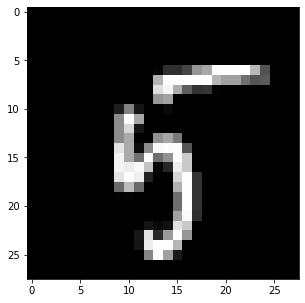

In [18]:
i = np.random.randint(0, len(X_test))
prediction = predict(W, B, X_test[i], len(B))
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(y_test[i])}")
plt.figure(figsize=(6, 5))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [19]:
#W, B = initialize_weights(layers = [784, 60, 60, 10])
alpha = 0.046
epochs = 4
L = 4
print(f"Starting Cost = {MSE(W, B, X_train, y_train)}")
sample_size = len(X_train)
L = len(W)
for k in range(epochs):
    for xi, yi in zip(X_train, y_train):

        Z = [[0.0]]
        A = [xi]

        for i in range(1, L):
            z = W[i]@A[i-1] + B[i]
            a = sigmoid(z)
    
            Z.append(z)
            A.append(a)
    
        deltas = dict()
        delta_last = (A[L-1] - yi)*d_sigmoid(Z[L-1])
        deltas[L-1] = delta_last
        for i in range(L-2, 0, -1):
            deltas[i] = (W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
        for i in range(1, L):
            W[i] -= alpha*deltas[i] @ A[i-1].T
            B[i] -= alpha*deltas[i]    


    print(f"{k}-th Cost = {MSE(W, B, X_train, y_train)}")

Starting Cost = 1.6006782090627476
0-th Cost = 0.07190880106044358
1-th Cost = 0.05151848373662988
2-th Cost = 0.040693673585616125
3-th Cost = 0.0341264400883274
